In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv


In [2]:
##reading the file 
df=pd.read_csv('/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv')

In [3]:
df.shape

(270, 14)

In [4]:
##top 10 df 
df.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [5]:
df.tail(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
260,58,0,3,120,340,0,0,172,0,0.0,1,0,3,Absence
261,60,1,4,130,206,0,2,132,1,2.4,2,2,7,Presence
262,58,1,2,120,284,0,2,160,0,1.8,2,0,3,Presence
263,49,1,2,130,266,0,0,171,0,0.6,1,0,3,Absence
264,48,1,2,110,229,0,0,168,0,1.0,3,0,7,Presence
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [6]:
df.sample(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
174,34,1,1,118,182,0,2,174,0,0.0,1,0,3,Absence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
125,54,0,3,160,201,0,0,163,0,0.0,1,1,3,Absence
15,71,0,4,112,149,0,0,125,0,1.6,2,0,3,Absence
182,41,1,4,110,172,0,2,158,0,0.0,1,0,7,Presence
237,43,1,4,120,177,0,2,120,1,2.5,2,0,7,Presence
89,50,1,4,150,243,0,2,128,0,2.6,2,0,7,Presence
216,63,0,3,135,252,0,2,172,0,0.0,1,0,3,Absence
117,56,0,4,200,288,1,2,133,1,4.0,3,2,7,Presence
191,70,1,4,145,174,0,0,125,1,2.6,3,0,7,Presence


# **Let's Start Data Preparation**
* **Data Clearning**
* **Data Exploration**

In [7]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [9]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [10]:
df.duplicated().sum()

0

**Data Visualization for understand the insight of data**

In [11]:
#importing required library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

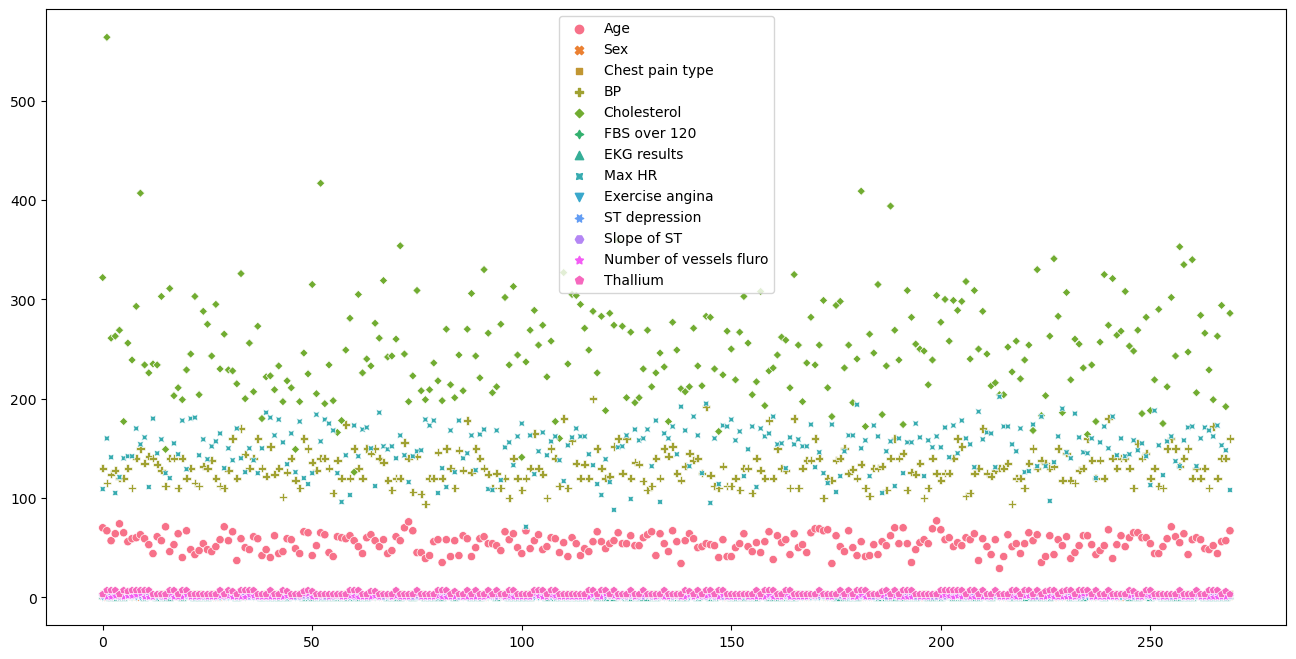

In [12]:
plt.figure(figsize=(16,8))
sns.scatterplot(df)

<Axes: xlabel='Chest pain type', ylabel='Age'>

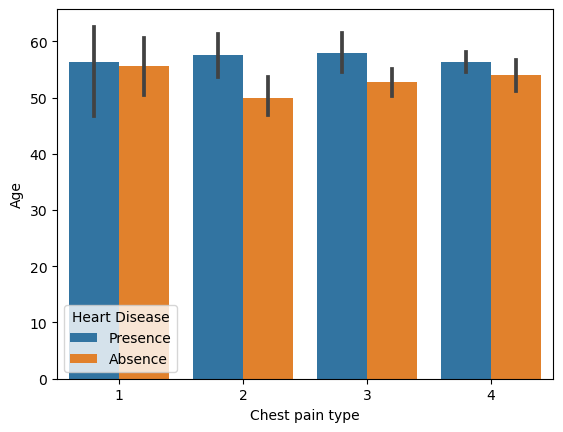

In [13]:
sns.barplot(x=df['Chest pain type'],y=df['Age'],hue=df['Heart Disease'])

<Axes: >

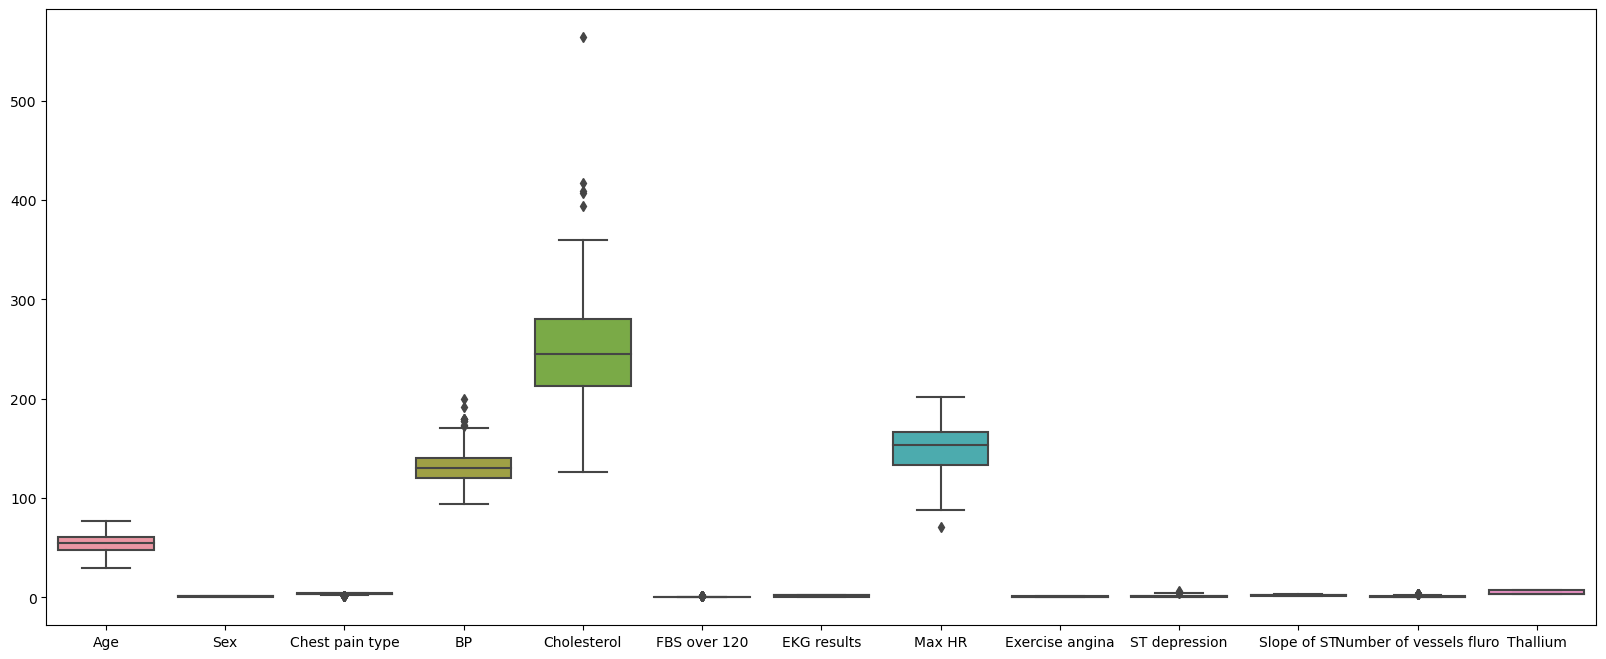

In [14]:
plt.figure(figsize=(20,8))
sns.boxplot(df)

<Axes: >

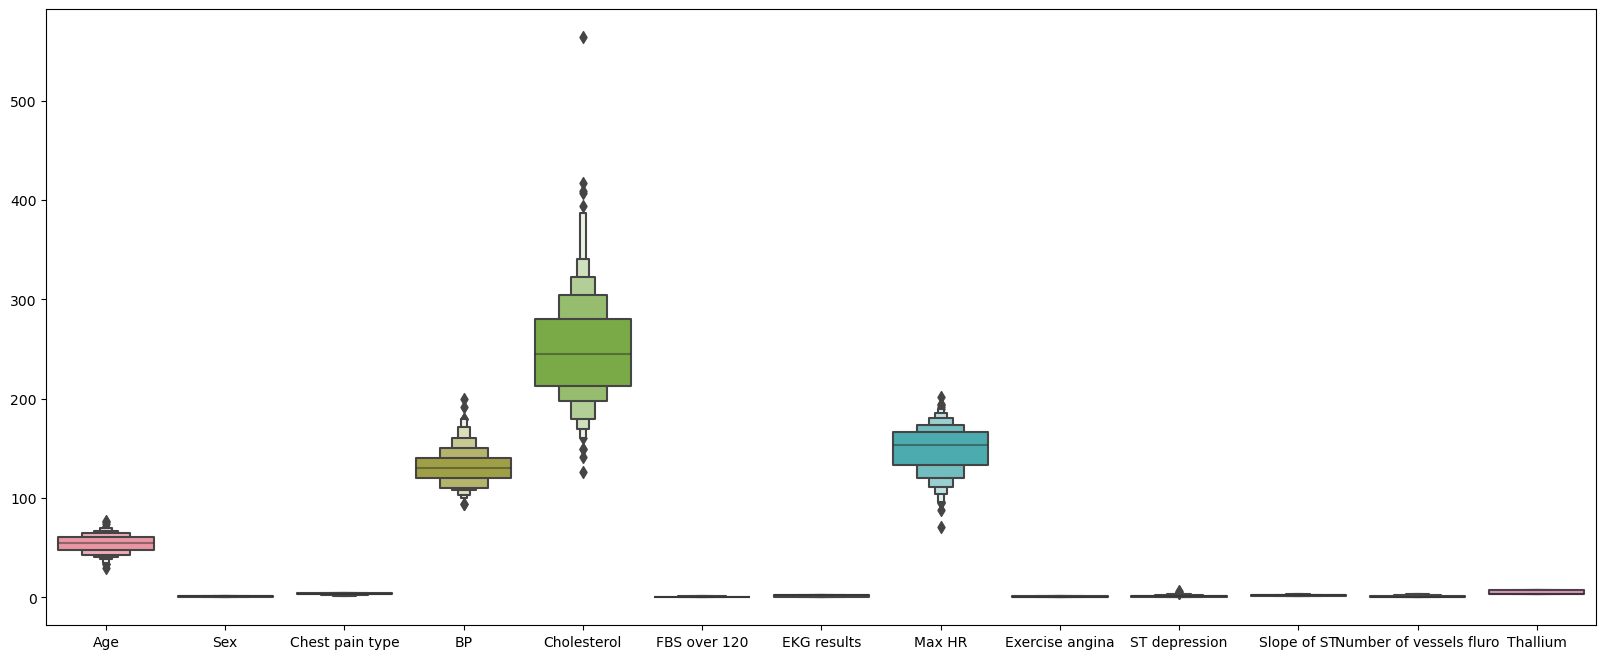

In [15]:
plt.figure(figsize=(20,8))
sns.boxenplot(df)

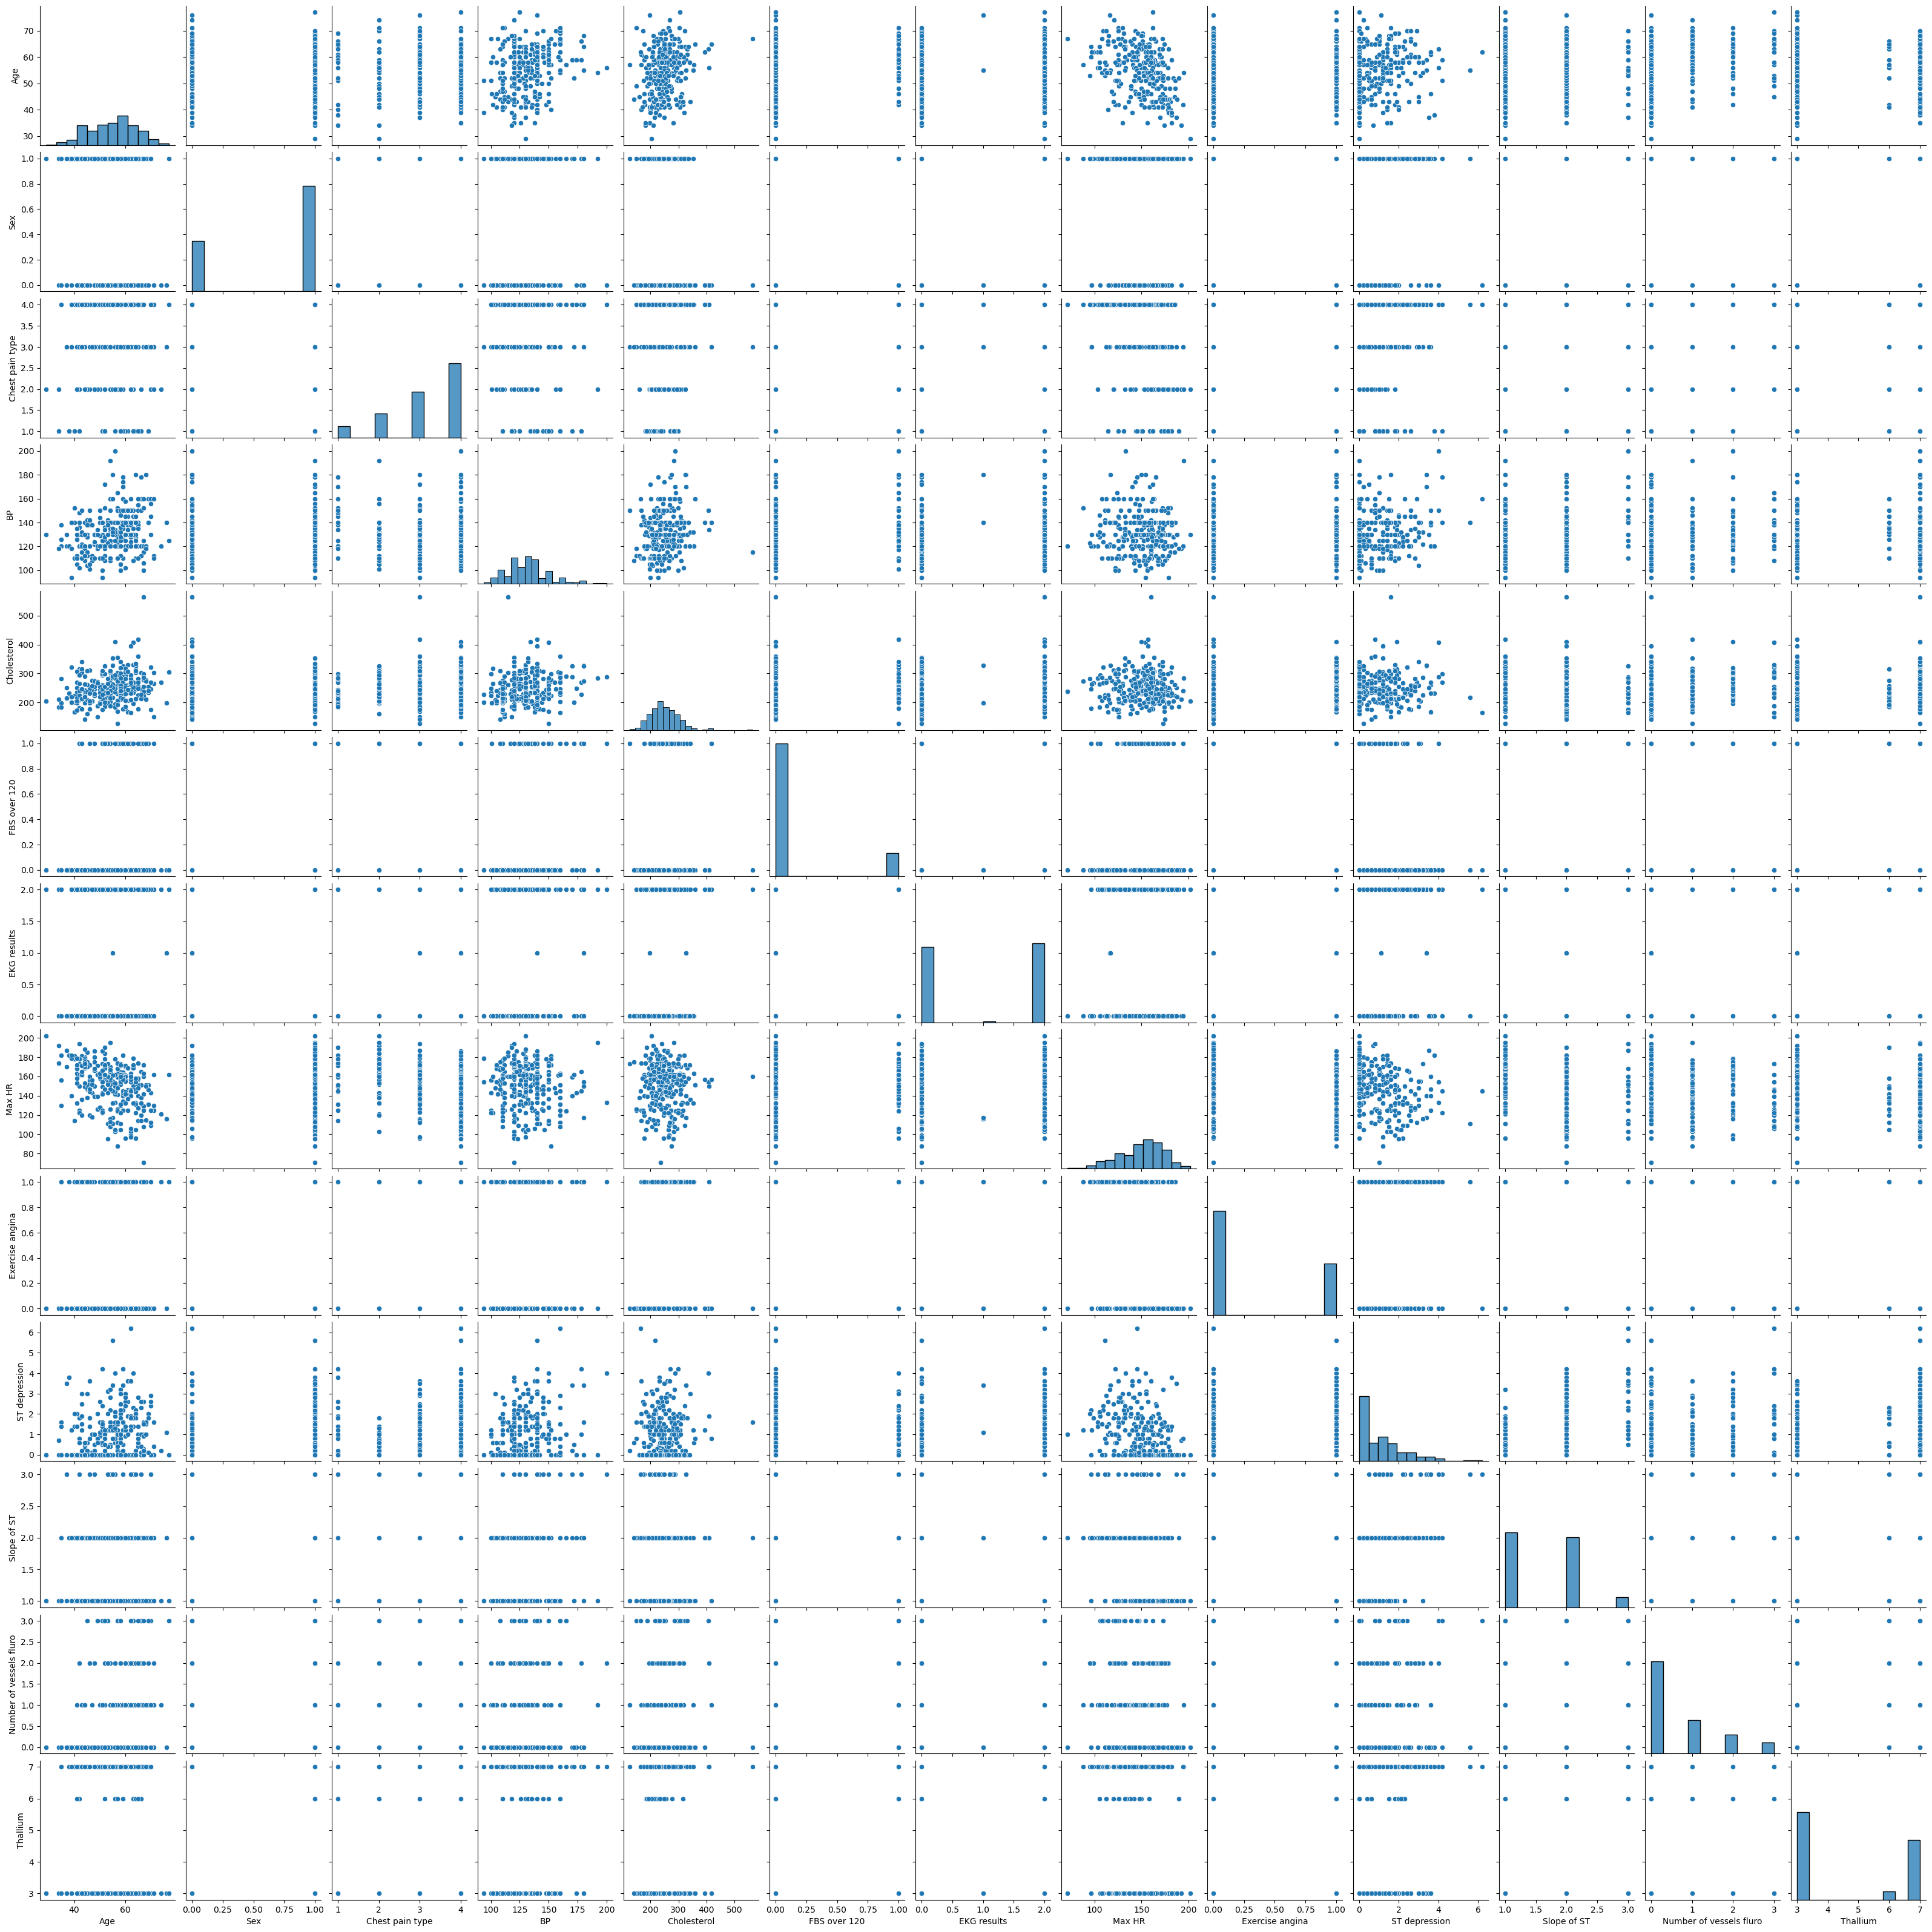

In [16]:
sns.pairplot(df)

In [17]:
num_var=[]
for columns in df.columns:
    if df[columns].dtype == 'int64' or  df[columns].dtype == 'float64' or df[columns].dtype != 'object':
        num_var.append(columns)

In [18]:
num_var

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Max HR',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium']

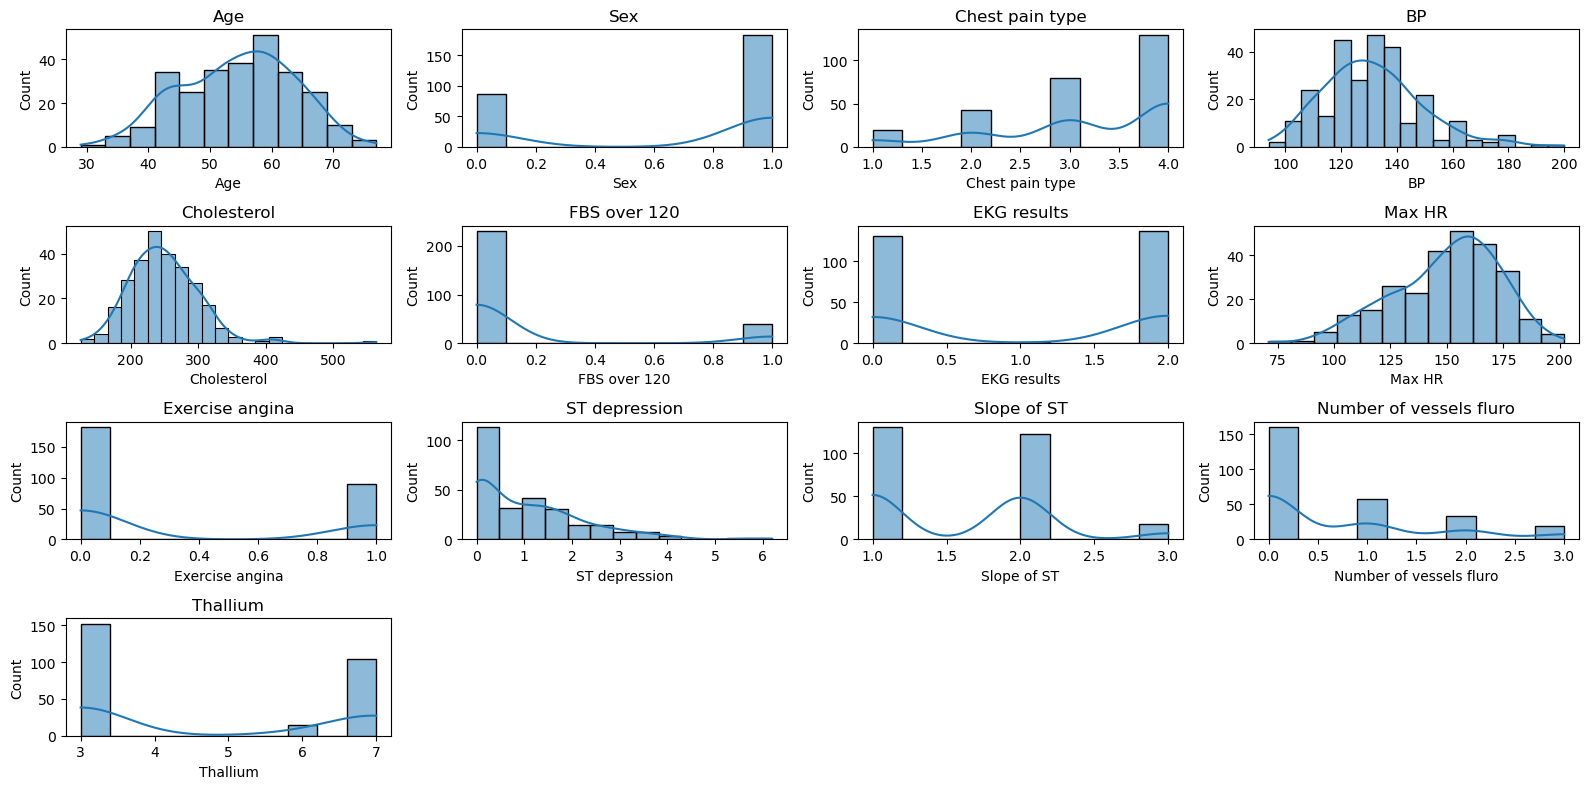

In [19]:
plt.figure(figsize=(16, 8))
num_var = df[num_var]

for i, var in enumerate(num_var):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(var)

plt.tight_layout()
plt.show()

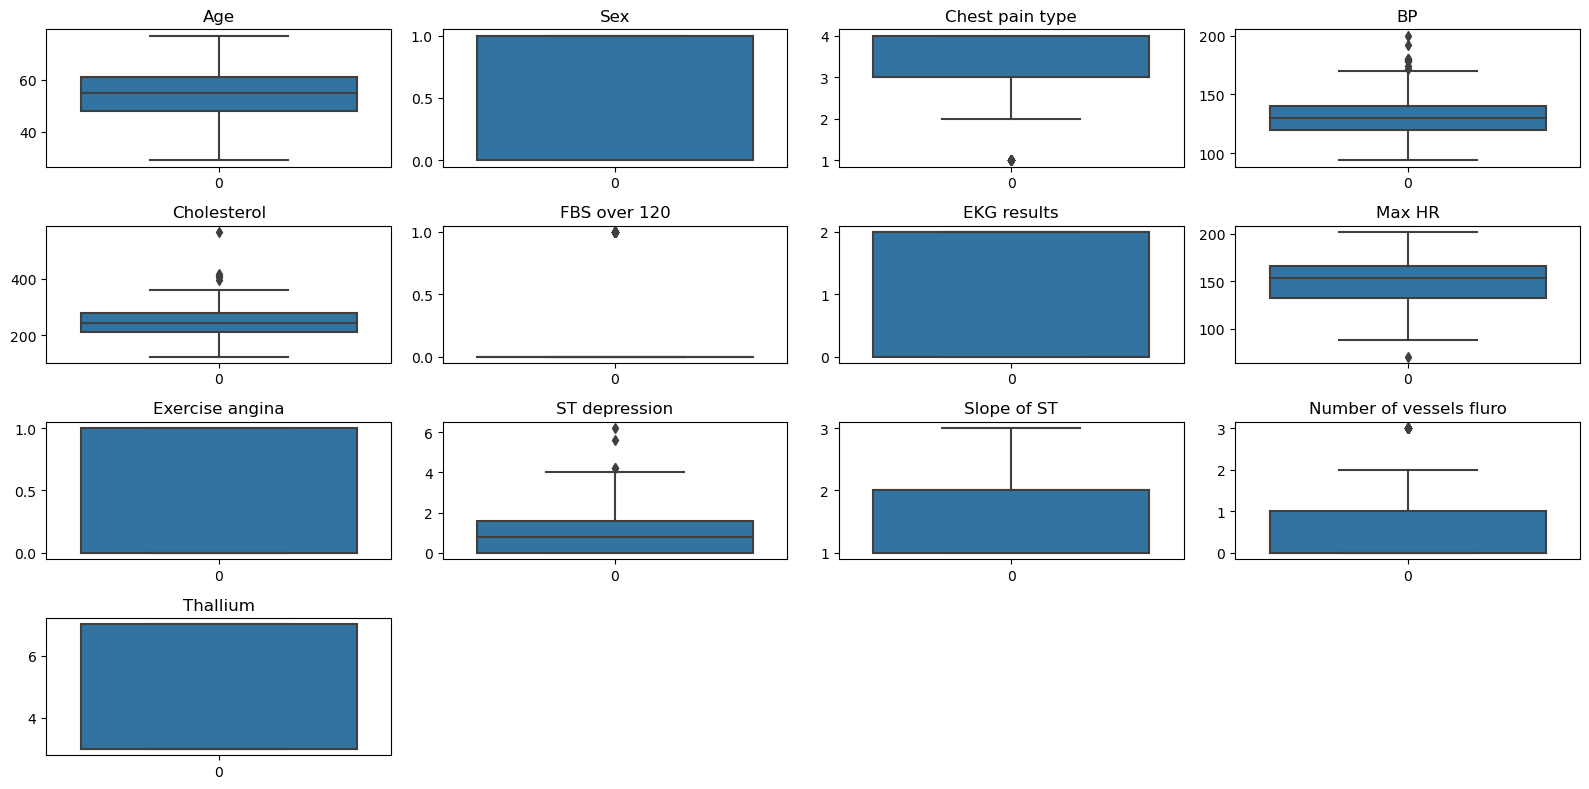

In [20]:
plt.figure(figsize=(16, 8))
# num_var = df[num_var]

for i, var in enumerate(num_var):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

Let's Split the data into two part train and test part

In [21]:
X=df.drop(columns='Heart Disease')
y=df['Heart Disease']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [23]:
le=LabelEncoder()
stc=StandardScaler()

In [24]:
y=le.fit_transform(y)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Logistic Regression**

In [26]:
lgr=LogisticRegression()

In [27]:
lgr.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred_lgr=lgr.predict(X_test)

In [29]:
score_lgr=accuracy_score(y_test,y_pred_lgr)

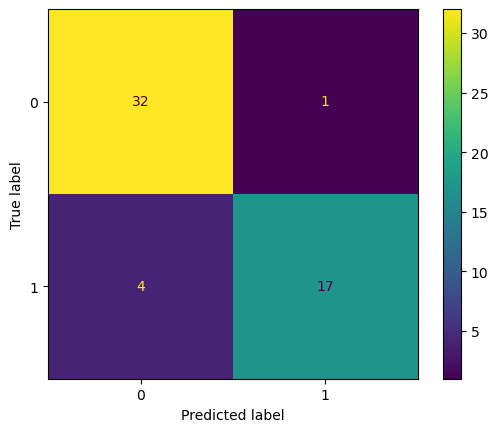

In [30]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lgr)).plot()

In [31]:
print(classification_report(y_test,y_pred_lgr))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



**Decision Tree classification**

In [32]:
dtc=DecisionTreeClassifier()

In [33]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred_dtc=dtc.predict(X_test)

In [35]:
score_dtc=accuracy_score(y_test,y_pred_dtc)

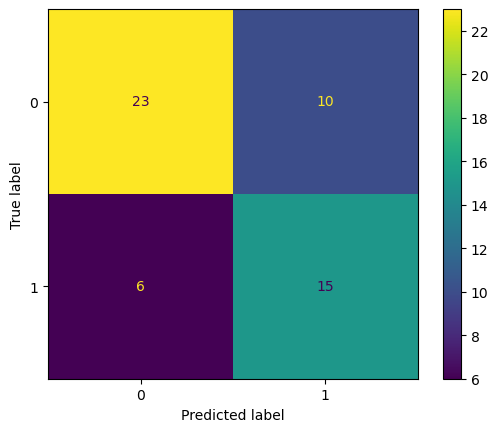

In [36]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtc)).plot()

In [37]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74        33
           1       0.60      0.71      0.65        21

    accuracy                           0.70        54
   macro avg       0.70      0.71      0.70        54
weighted avg       0.72      0.70      0.71        54



**Random Forest Classifier**

In [38]:
rfc=RandomForestClassifier()

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
y_pred_rfc=rfc.predict(X_test)

In [41]:
score_rfc=accuracy_score(y_test,y_pred_rfc)

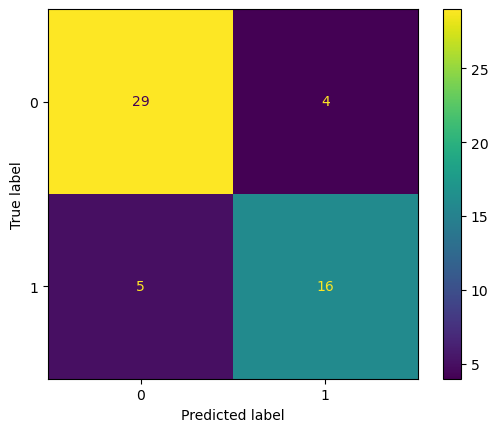

In [42]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()

In [43]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.80      0.76      0.78        21

    accuracy                           0.83        54
   macro avg       0.83      0.82      0.82        54
weighted avg       0.83      0.83      0.83        54



**AdaBoosting Classifier**

In [44]:
adabc=AdaBoostClassifier()

In [45]:
adabc.fit(X_train,y_train)

AdaBoostClassifier()

In [46]:
y_pred_ada=adabc.predict(X_test)

In [47]:
score_ada=accuracy_score(y_test,y_pred_ada)

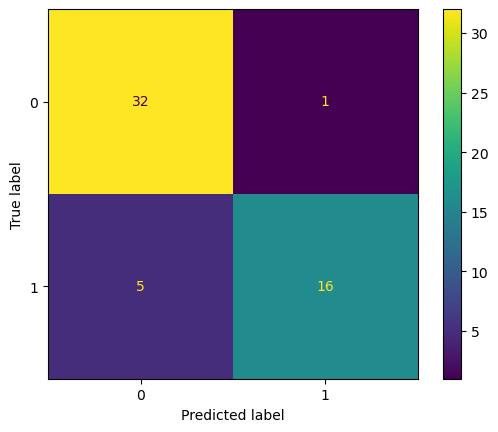

In [48]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ada)).plot()

In [49]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.94      0.76      0.84        21

    accuracy                           0.89        54
   macro avg       0.90      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



Bagging with Logistic Regression

In [50]:
bgg=BaggingClassifier(lgr,random_state=50)

In [51]:
bgg.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

BaggingClassifier(estimator=LogisticRegression(), random_state=50)

In [52]:
y_pred_bgg=bgg.predict(X_test)

In [53]:
score_bgg=accuracy_score(y_test,y_pred_bgg)

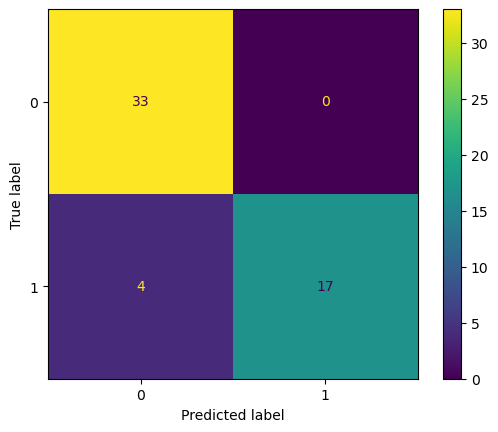

In [54]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bgg)).plot()

In [55]:
print(classification_report(y_test,y_pred_bgg))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.81      0.89        21

    accuracy                           0.93        54
   macro avg       0.95      0.90      0.92        54
weighted avg       0.93      0.93      0.92        54



In [56]:
gbc=GradientBoostingClassifier()

In [57]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [58]:
y_pred_gbc=gbc.predict(X_test)

In [59]:
score_gbc=accuracy_score(y_test,y_pred_gbc)

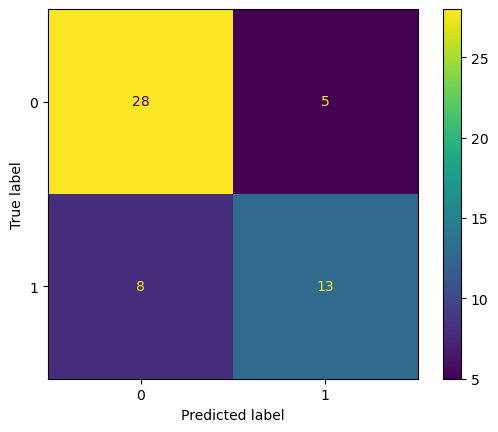

In [60]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gbc)).plot()

In [61]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.72      0.62      0.67        21

    accuracy                           0.76        54
   macro avg       0.75      0.73      0.74        54
weighted avg       0.76      0.76      0.76        54



In [62]:
import xgboost

In [63]:
gxb=xgboost.XGBClassifier()

In [64]:
gxb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [65]:
y_pred_xgb=gxb.predict(X_test)

In [66]:
score_xgb=accuracy_score(y_test,y_pred_xgb)

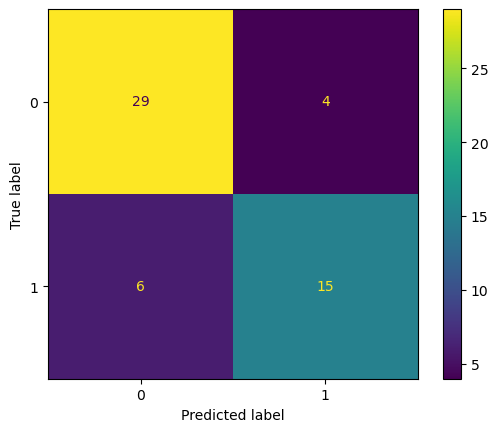

In [67]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_xgb)).plot()

In [68]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.79      0.71      0.75        21

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54



In [69]:
score={
    'Model Name':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier','Bagging Class','Gradiant Boosting Classifier','Xgboosting Classifier'],
    'Score':[score_lgr,score_dtc,score_rfc,score_ada,score_bgg,score_gbc,score_xgb],
}

***From these model our ideal model is Bagging classifier, so we will peak this model only***

In [70]:
pd.DataFrame(score)

,Model Name,Score
0,Logistic Regression,0.907407
1,Decision Tree Classifier,0.703704
2,Random Forest Classifier,0.833333
3,AdaBoost Classifier,0.888889
4,Bagging Class,0.925926
5,Gradiant Boosting Classifier,0.759259
6,Xgboosting Classifier,0.814815


***Let's Test prediction wether with our ideal model how performing on the random dataset***

In [71]:
df.sample()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
228,58,0,1,150,283,1,2,162,0,1.0,1,0,3,Absence


In [72]:
bgg.predict(pd.DataFrame([[68,1,3,180,274,1,2,150,1,1.6,2,0,7]],columns=['Age','Sex','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium']))

array([1])

In [73]:
bgg.predict(pd.DataFrame([[64,0,3,140,313,0,0,133,0,0.2,1,0,7]],columns=['Age','Sex','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium']))

array([0])

In [74]:
bgg.predict(pd.DataFrame([[54,1,2,108,309,0,0,156,0,0.0,1,0,7]],columns=['Age','Sex','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium']))

array([0])